In [1]:
import os
import tarfile
import pandas as pd
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH =  os.path.join("datasets/", "housing/")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# Function to fetch the data.
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
   os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [5]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [6]:
# Visualizing entries
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.describe()

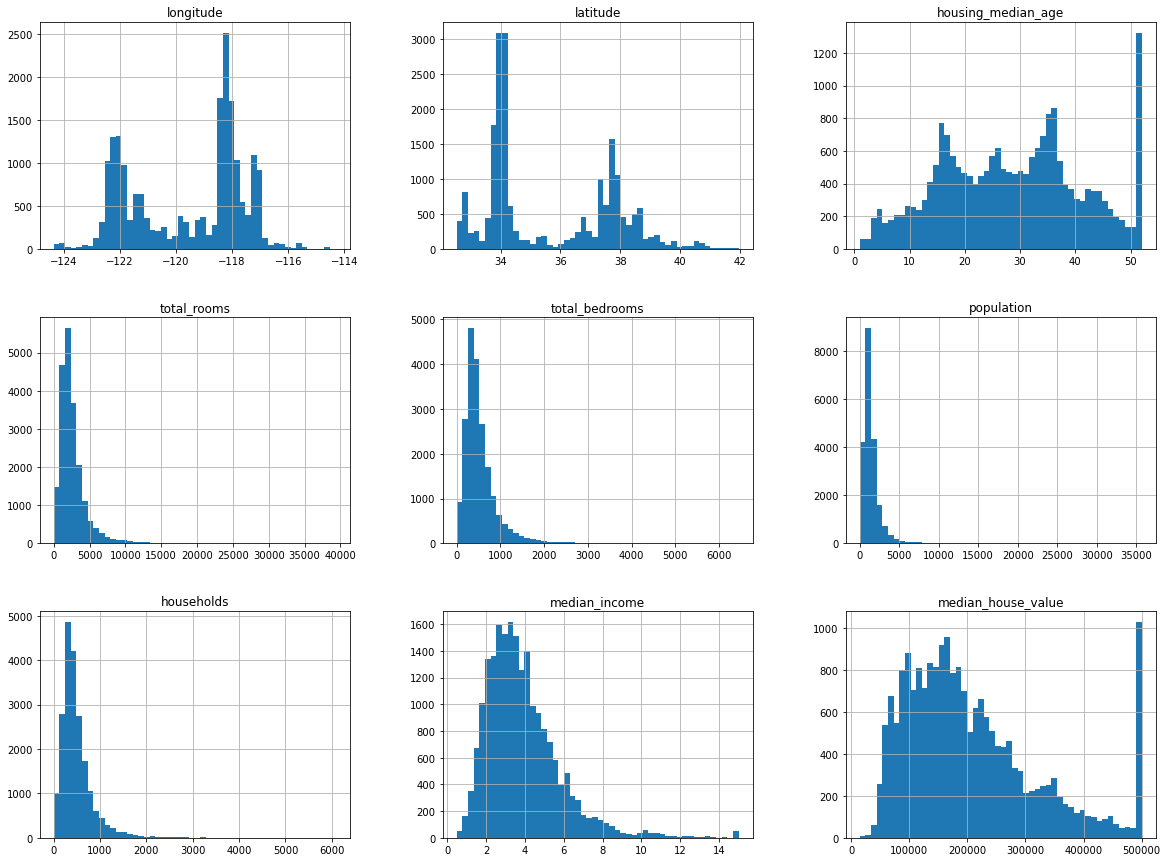

In [7]:
# Histogram visualization
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# We can visualize that slightly over 800 districts have a
# median_house_value equal to about $100,000.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

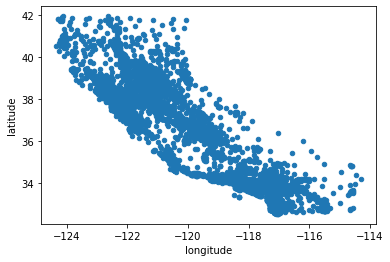

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
# Gaining more insights by looking at the housing prices. With the radius of each circle representing
# the district’s population (option s), and the color representing the price (option c).
# Applying a predefined color map called jet, which ranges from blue (low price values) to red (high price prices)

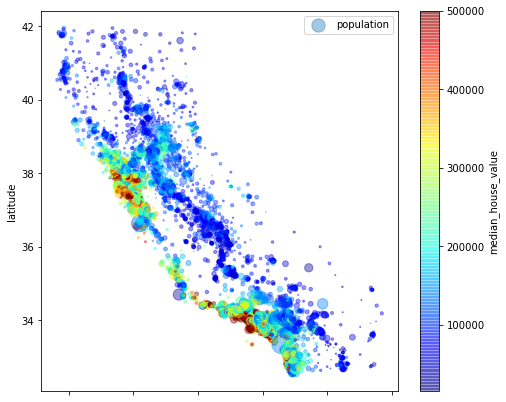

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(8,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
# Image results show that the housing prices are very much related to the location.
# (e.g., close to the ocean) and to the population density.
# Now looking at how much each attribute correlates with the median house value.

In [10]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64